In [2]:
from arpes.io import load_data
import os.path

C:\Users\hellbrue\Documents\Repositories\pyarpes\arpes\config.py:54: UserWarning: Could not find local configuration file. If you don't have one, you can safely ignore this message.
  warnings.warn(msg)


Activating auto-logging. Current session state plus future input saved.
Filename       : logs\unnamed_2022-12-13_12-28-51.log
Mode           : backup
Output logging : False
Raw input log  : False
Timestamping   : False
State          : active


# Overview of EDCs of Bi2223 measured at 1. Beamtime
The notebook shows a overview of the various different EDC cuts measured on the 1. Beamtime on Bi2223. Only one crystal was measured on this beamtime. The data was taken at Low Temperature (around 11K) and High Temp (around 127K).
Additionally to the EDC cuts of Bi2223, cuts of polycrystalline Gold foil were measured to have an accurate presentation of the Fermi Level. These cuts are also displayed here.

## EDCs of Bi2223 at High and Low Temp

In [3]:
# Define directory
path = os.path.abspath("G:\My Drive\Bi2223\e19557\Box_1_square_renamed")

# Different parameters used to set up scans at SLS
scan_type = 'EDC'
direction = '*'
phi = '*'
energy = '*'+'eV'
polarization = '*'
temp = '*'
e_pass = '*'+'eVpass'
comment = ''
run = '*'.zfill(4)

# Put together string for finding file
phi = phi.replace('+', 'P').replace('-', 'M').replace('.', 'p')
energy = energy.replace('.', 'p')
parameters = [scan_type, direction, phi, energy, polarization, temp, e_pass, comment, run]
if comment == '':
    parameters.remove(comment)
file_type = 'h5'
file_name = '_'.join(parameters)
file = '.'.join([file_name , file_type])

full_file = os.path.join(path, file)
file

'EDC_*_*_*eV_*_*_*eVpass_000*.h5'

In [4]:
import glob
# Load all files with above specified parameters, * is a placeholder and imports all files in its place
files = glob.glob(full_file)
print(len(files))
files

12


['G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\EDC_AN_P2p5_25eV_UNKN_LT_10eVpass_0000.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\EDC_AN_P2p5_25eV_CIRCP_LT_10eVpass_0001.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\EDC_AN_P2p5_25eV_CIRCP_LT_10eVpass_0000.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\EDC_N_M40_26p5eV_CIRCP_LT_5eVpass_0000.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\EDC_AN_P95_25eV_LHQ_LT_5eVpass_0000.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\EDC_AN_P95_25eV_CIRCP_HT_10eVpass_0000.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\EDC_AN_P5_25eV_CIRCP_HT_10eVpass_0000.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\EDC_N_P50_52eV_LVLE_LT_10eVpass_0000.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\EDC_N_P50_52eV_LHQ_LT_10eVpass_0000.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\EDC_N_P50_26p5eV_LHQ_LT_5eVpass_0000.h5',
 'G:\\My Drive\\Bi2223\\e1955

In [5]:
data_list = {}
for file in files:
    #data_list.append(load_data(file, location="ULTRA"))
    data = load_data(file, location="ULTRA")
    file_name = file.replace(path, '')[1:-3]
    data_list.update({file_name : data})

[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]]
[0]
AxesSubplot(0.125,0.712609;0.227941x0.167391)
[1]
AxesSubplot(0.398529,0.712609;0.227941x0.167391)
[2]
AxesSubplot(0.672059,0.712609;0.227941x0.167391)
[3]
AxesSubplot(0.125,0.511739;0.227941x0.167391)
[4]
AxesSubplot(0.398529,0.511739;0.227941x0.167391)
[5]
AxesSubplot(0.672059,0.511739;0.227941x0.167391)
[6]
AxesSubplot(0.125,0.31087;0.227941x0.167391)
[7]
AxesSubplot(0.398529,0.31087;0.227941x0.167391)
[8]
AxesSubplot(0.672059,0.31087;0.227941x0.167391)
[9]
AxesSubplot(0.125,0.11;0.227941x0.167391)
[10]
AxesSubplot(0.398529,0.11;0.227941x0.167391)
[11]
AxesSubplot(0.672059,0.11;0.227941x0.167391)


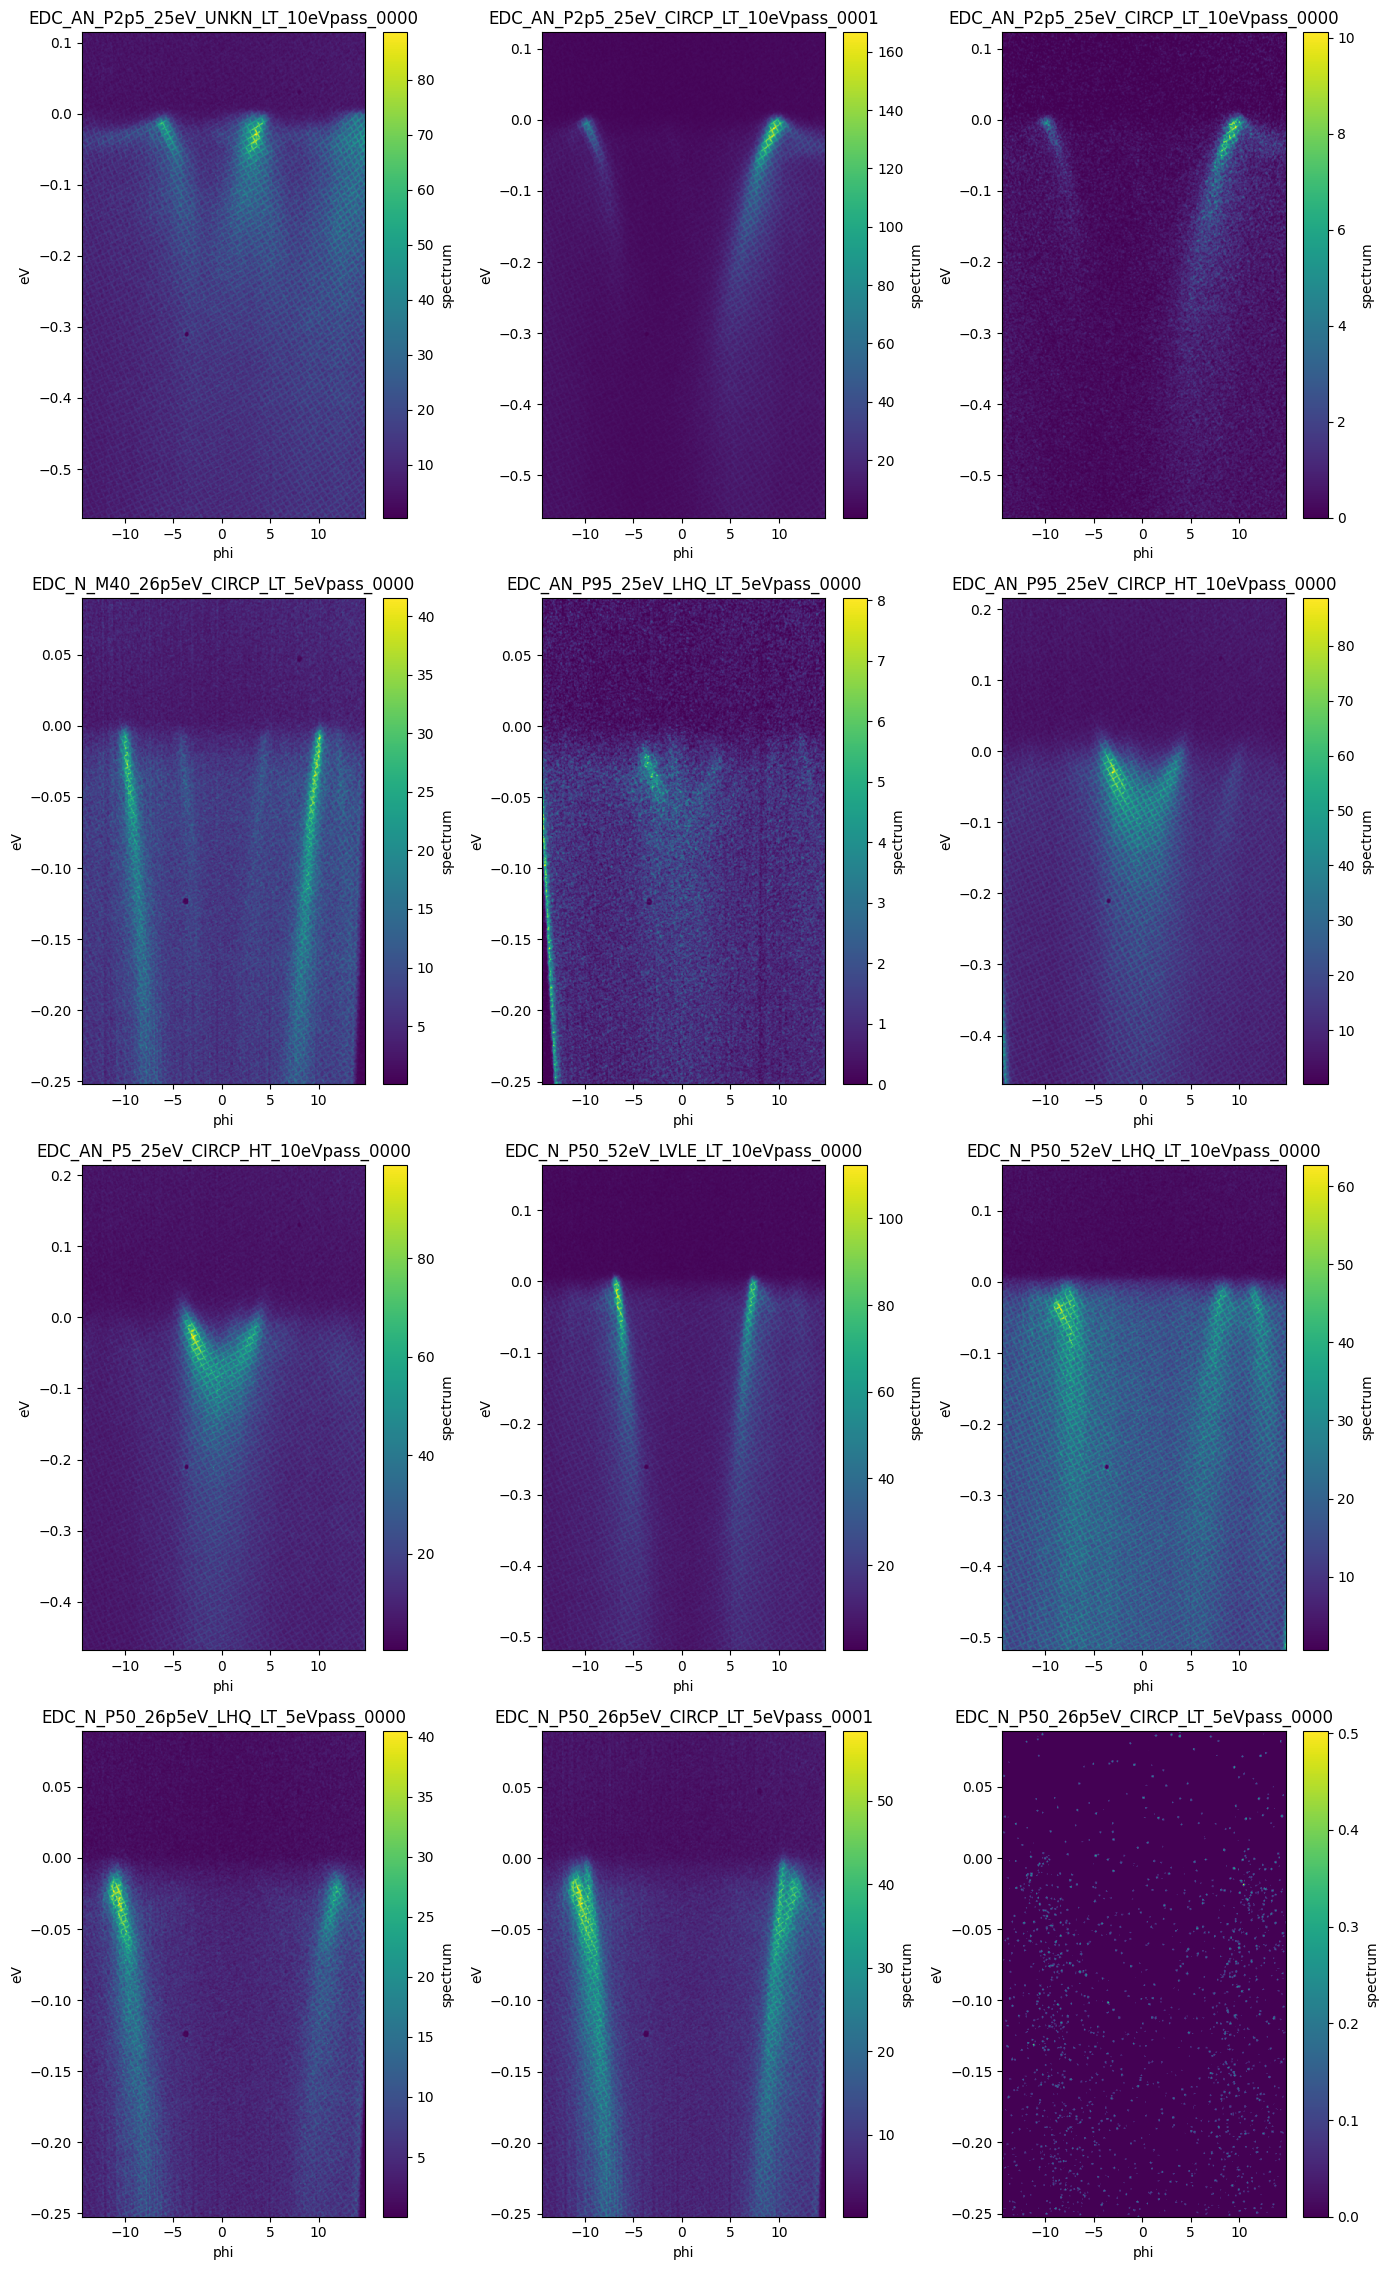

In [9]:
import matplotlib.pyplot as plt
import math
rows = math.ceil(len(data_list) / 3)
fig, ax = plt.subplots(rows, 3, figsize=(14, 6*rows))   
for key in data_list.keys():
    data_list[key].spectrum.S.plot(ax=ax.ravel()[list(data_list).index(key)])
    ax.ravel()[list(data_list).index(key)].set_title(f"{key}")
    
    # For plotting individual subplots
    # extent = ax.ravel()[list(data_list).index(key)].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    # plt.savefig(key, bbox_inches=extent.expanded(1.1, 1.2))

plt.tight_layout(rect=[0, 0.03, 1, 0.98])

## EDC cuts of Au at Low Temperature

In [6]:
# Define directory
path = os.path.abspath("G:\My Drive\Bi2223\e19557\Box_1_square_renamed")

# Different parameters used to set up scans at SLS
scan_type = 'EDC'
direction = '*'
phi = '*'
energy = '*'
polarization = '*'
temp = '*'
e_pass = '*'+'eVpass'
comment = 'GoldRef11K'
run = '*'.zfill(4)

# Put together string for finding file
parameters = [scan_type, direction, phi, energy, polarization, temp, e_pass, comment, run]
if comment == '':
    parameters.remove(comment)
file_type = 'h5'
file_name = '_'.join(parameters)
file = '.'.join([file_name , file_type])

full_file = os.path.join(path, file)
file

'EDC_*_*_*_*_*_*eVpass_GoldRef11K_000*.h5'

In [7]:
import glob
# Load all files with above specified parameters, * is a placeholder and imports all files in its place
files = glob.glob(full_file)
print(len(files))
files

13


['G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\EDC_X_P95_26p5eV_UNKN_LT_5eVpass_GoldRef11K_0002.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\EDC_X_P95_26p5eV_UNKN_LT_5eVpass_GoldRef11K_0001.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\EDC_X_P95_26p5eV_UNKN_LT_5eVpass_GoldRef11K_0000.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\EDC_X_P95_26p5eV_UNKN_LT_20eVpass_GoldRef11K_0000.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\EDC_X_P95_25eV_UNKN_LT_5eVpass_GoldRef11K_0007.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\EDC_X_P95_25eV_UNKN_LT_5eVpass_GoldRef11K_0006.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\EDC_X_P95_25eV_UNKN_LT_5eVpass_GoldRef11K_0005.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\EDC_X_P95_25eV_UNKN_LT_5eVpass_GoldRef11K_0004.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\EDC_X_P95_25eV_UNKN_LT_5eVpass_GoldRef11K_0003.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Box_1

In [8]:
data_list = {}
for file in files:
    #data_list.append(load_data(file, location="ULTRA"))
    data = load_data(file, location="ULTRA")
    file_name = file.replace(path, '')[1:-3]
    data_list.update({file_name : data})

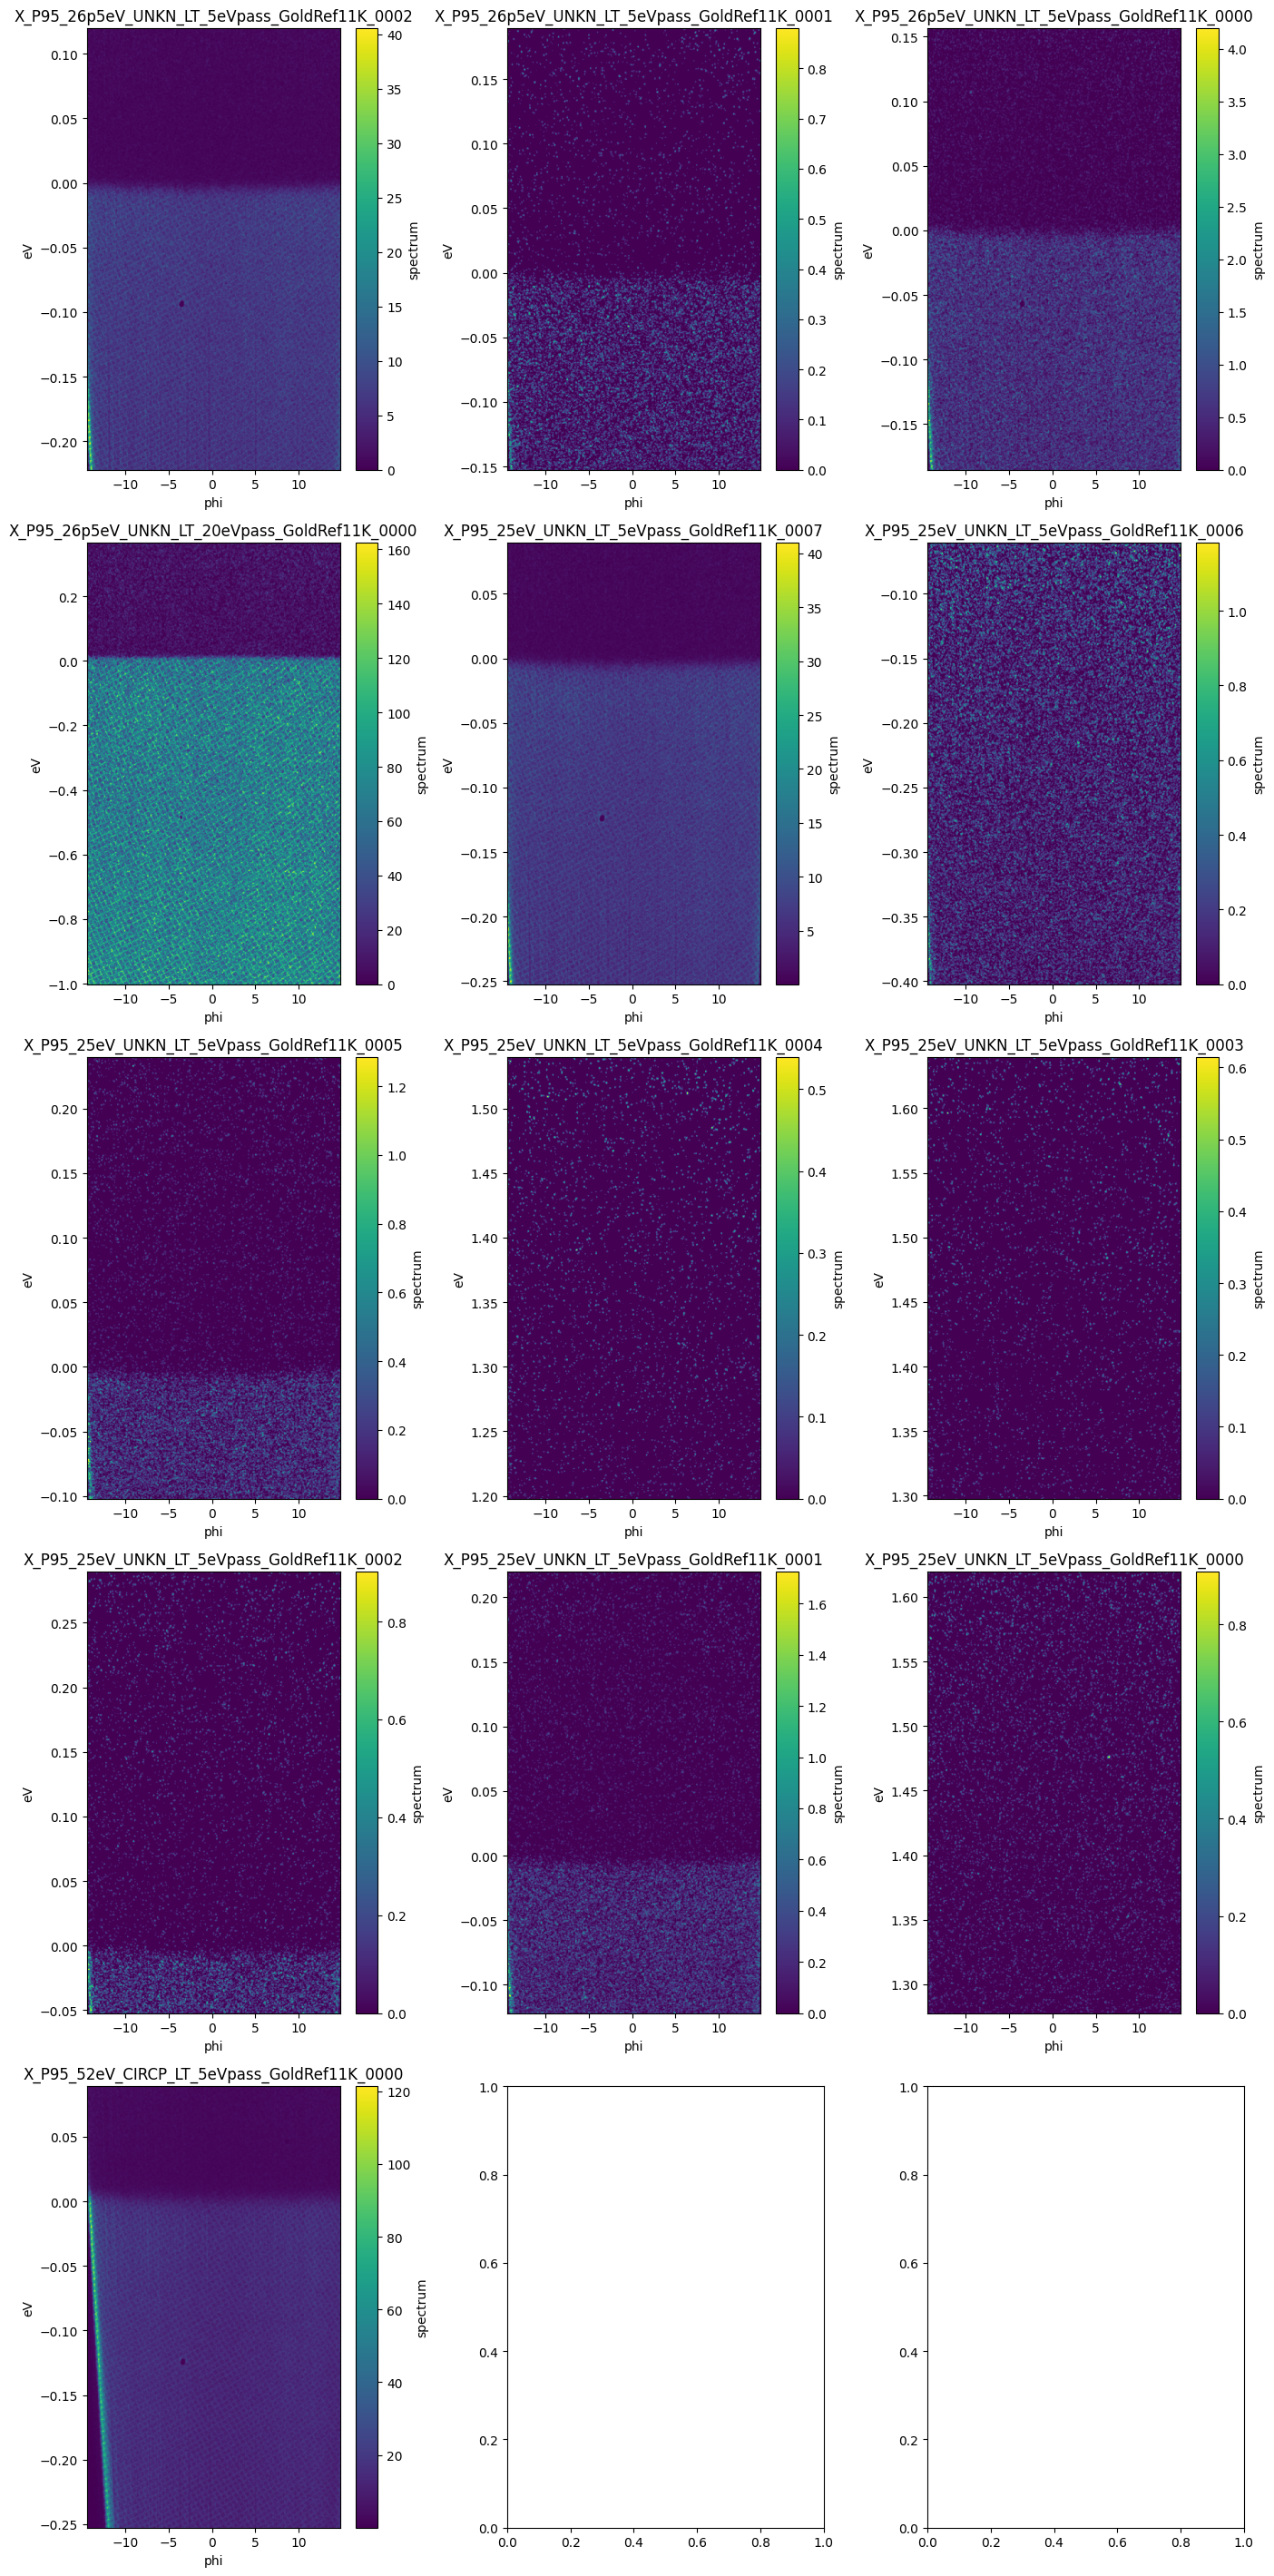

In [9]:
import matplotlib.pyplot as plt
import math
rows = math.ceil(len(data_list) / 3)
fig, ax = plt.subplots(rows, 3, figsize=(14, 6*rows))
    
for key in data_list.keys():
    data_list[key].spectrum.S.plot(ax=ax.ravel()[list(data_list).index(key)])
    ax.ravel()[list(data_list).index(key)].set_title(f"{key}".replace("EDC_",''))

plt.tight_layout(rect=[0, 0.03, 1, 0.98])

## EDC cuts of Au at High Temperature

In [10]:
# Define directory
path = os.path.abspath("G:\My Drive\Bi2223\e19557\Box_1_square_renamed")

# Different parameters used to set up scans at SLS
scan_type = 'EDC'
direction = '*'
phi = '*'
energy = '*'
polarization = '*'
temp = '*'
e_pass = '*'+'eVpass'
comment = 'GoldRef127K'
run = '*'.zfill(4)

# Put together string for finding file
parameters = [scan_type, direction, phi, energy, polarization, temp, e_pass, comment, run]
if comment == '':
    parameters.remove(comment)
file_type = 'h5'
file_name = '_'.join(parameters)
file = '.'.join([file_name , file_type])

full_file = os.path.join(path, file)
file

'EDC_*_*_*_*_*_*eVpass_GoldRef127K_000*.h5'

In [11]:
import glob
# Load all files with above specified parameters, * is a placeholder and imports all files in its place
files = glob.glob(full_file)
print(len(files))
files

2


['G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\EDC_X_P95_26p5eV_CIRCP_HT_5eVpass_GoldRef127K_0000.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\EDC_X_P95_25eV_CIRCP_HT_5eVpass_GoldRef127K_0000.h5']

In [12]:
data_list = {}
for file in files:
    #data_list.append(load_data(file, location="ULTRA"))
    data = load_data(file, location="ULTRA")
    file_name = file.replace(path, '')[1:-3]
    data_list.update({file_name : data})

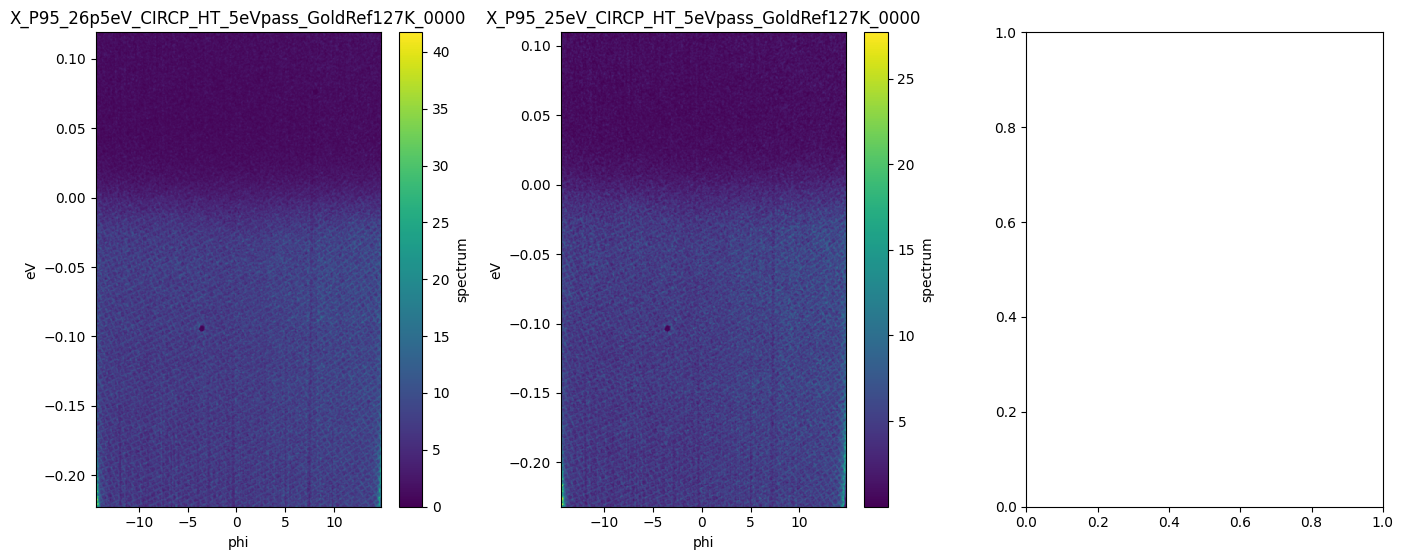

In [13]:
import matplotlib.pyplot as plt
import math
rows = math.ceil(len(data_list) / 3)
fig, ax = plt.subplots(rows, 3, figsize=(14, 6*rows))
    
for key in data_list.keys():
    data_list[key].spectrum.S.plot(ax=ax.ravel()[list(data_list).index(key)])
    ax.ravel()[list(data_list).index(key)].set_title(f"{key}".replace("EDC_",''))

plt.tight_layout(rect=[0, 0.03, 1, 0.98])